In [1]:
# !pip install fasteda
# from fasteda import fast_eda
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.manifold import TSNE

In [2]:
train = pd.read_csv("./train.csv").drop('id',axis=1)
test = pd.read_csv("./test.csv").drop('id',axis=1)
original = pd.read_csv("./ConcreteStrengthData.csv")

In [3]:
original = original.rename(columns={'CementComponent ':'CementComponent'})

In [4]:
print(original.columns)
print(train.columns)

Index(['CementComponent', 'BlastFurnaceSlag', 'FlyAshComponent',
       'WaterComponent', 'SuperplasticizerComponent',
       'CoarseAggregateComponent', 'FineAggregateComponent', 'AgeInDays',
       'Strength'],
      dtype='object')
Index(['CementComponent', 'BlastFurnaceSlag', 'FlyAshComponent',
       'WaterComponent', 'SuperplasticizerComponent',
       'CoarseAggregateComponent', 'FineAggregateComponent', 'AgeInDays',
       'Strength'],
      dtype='object')


In [5]:
print(len(train))
print(len(test))

5407
3605


In [6]:
train = pd.concat([train,original],axis=0)
train = train.drop_duplicates().reset_index(drop=True)
train = train[train['AgeInDays'] != 49]
train

,CementComponent,BlastFurnaceSlag,FlyAshComponent,WaterComponent,SuperplasticizerComponent,CoarseAggregateComponent,FineAggregateComponent,AgeInDays,Strength
0,525.0,0.0,0.0,186.0,0.0,1125.0,613.0,3,10.38
1,143.0,169.0,143.0,191.0,8.0,967.0,643.0,28,23.52
2,289.0,134.7,0.0,185.7,0.0,1075.0,795.3,28,36.96
3,304.0,76.0,0.0,228.0,0.0,932.0,670.0,365,39.05
4,157.0,236.0,0.0,192.0,0.0,935.4,781.2,90,74.19
...,...,...,...,...,...,...,...,...,...
6407,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
6408,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
6409,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
6410,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


In [7]:
print(len(train))
print(len(test))

6411
3605


In [8]:
train[train.CementComponent + train.BlastFurnaceSlag + train.FlyAshComponent + train.WaterComponent + train.SuperplasticizerComponent < (train.CoarseAggregateComponent-train.FlyAshComponent)]

,CementComponent,BlastFurnaceSlag,FlyAshComponent,WaterComponent,SuperplasticizerComponent,CoarseAggregateComponent,FineAggregateComponent,AgeInDays,Strength
0,525.0,0.0,0.0,186.0,0.0,1125.0,613.0,3,10.38
1,143.0,169.0,143.0,191.0,8.0,967.0,643.0,28,23.52
2,289.0,134.7,0.0,185.7,0.0,1075.0,795.3,28,36.96
3,304.0,76.0,0.0,228.0,0.0,932.0,670.0,365,39.05
4,157.0,236.0,0.0,192.0,0.0,935.4,781.2,90,74.19
...,...,...,...,...,...,...,...,...,...
6407,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
6408,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
6409,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
6410,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


In [9]:
train['Unknown'] = (train.CoarseAggregateComponent-train.FlyAshComponent) - (train.CementComponent + train.BlastFurnaceSlag + train.FlyAshComponent + train.WaterComponent + train.SuperplasticizerComponent)
test['Unknown'] = (test.CoarseAggregateComponent-test.FlyAshComponent) - (test.CementComponent + test.BlastFurnaceSlag + test.FlyAshComponent + test.WaterComponent + test.SuperplasticizerComponent)

In [10]:
train

,CementComponent,BlastFurnaceSlag,FlyAshComponent,WaterComponent,SuperplasticizerComponent,CoarseAggregateComponent,FineAggregateComponent,AgeInDays,Strength,Unknown
0,525.0,0.0,0.0,186.0,0.0,1125.0,613.0,3,10.38,414.0
1,143.0,169.0,143.0,191.0,8.0,967.0,643.0,28,23.52,170.0
2,289.0,134.7,0.0,185.7,0.0,1075.0,795.3,28,36.96,465.6
3,304.0,76.0,0.0,228.0,0.0,932.0,670.0,365,39.05,324.0
4,157.0,236.0,0.0,192.0,0.0,935.4,781.2,90,74.19,350.4
...,...,...,...,...,...,...,...,...,...,...
6407,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28,108.6
6408,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18,58.1
6409,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70,188.5
6410,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77,456.9


In [11]:
print([i for i in sorted(train.AgeInDays.unique())])
print([i for i in sorted(test.AgeInDays.unique())])


[1, 3, 7, 14, 28, 56, 90, 91, 100, 120, 180, 270, 360, 365]
[1, 3, 7, 11, 14, 28, 56, 90, 91, 100, 120, 180, 270, 360, 365]


In [12]:
test.loc[197,'AgeInDays'] = 14

In [13]:
print([i for i in sorted(train.AgeInDays.unique())])
print([i for i in sorted(test.AgeInDays.unique())])


[1, 3, 7, 14, 28, 56, 90, 91, 100, 120, 180, 270, 360, 365]
[1, 3, 7, 14, 28, 56, 90, 91, 100, 120, 180, 270, 360, 365]


In [14]:
print(len(train))
print(len(test))

6411
3605


In [15]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
encoder.fit([i for i in sorted(train.AgeInDays.unique())])
train.AgeInDays = encoder.transform(train.AgeInDays)
test.AgeInDays = encoder.transform(test.AgeInDays)

In [16]:
train.describe()

,CementComponent,BlastFurnaceSlag,FlyAshComponent,WaterComponent,SuperplasticizerComponent,CoarseAggregateComponent,FineAggregateComponent,AgeInDays,Strength,Unknown
count,6411.000000,6411.000000,6411.000000,6411.000000,6411.000000,6411.000000,6411.000000,6411.000000,6411.000000,6411.000000
mean,295.934846,60.710232,35.575074,184.604757,4.409209,989.259785,771.460443,4.338325,35.415860,372.450591
std,105.609623,83.995827,56.869697,19.018388,5.770679,77.462298,78.977890,2.636039,16.379638,155.551630
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,0.000000,2.330000,-234.900000
25%,212.500000,0.000000,0.000000,173.500000,0.000000,938.000000,734.300000,2.000000,23.640000,264.350000
50%,295.800000,0.000000,0.000000,186.000000,0.000000,975.600000,781.000000,4.000000,33.940000,404.600000
75%,374.000000,129.800000,94.050000,192.000000,8.650000,1047.000000,821.000000,5.000000,45.710000,473.000000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,13.000000,82.600000,772.000000


C:\Users\user\AppData\Local\Temp\ipykernel_26768\772918885.py:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train[f'{i}'],bins=50)#.plot.hist(bins=100,grid='on',figsize=(5,5))
C:\Users\user\AppData\Local\Temp\ipykernel_26768\772918885.py:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(test

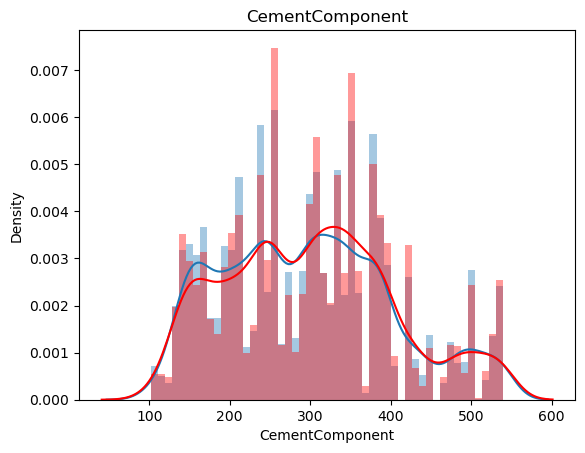

C:\Users\user\AppData\Local\Temp\ipykernel_26768\772918885.py:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train[f'{i}'],bins=50)#.plot.hist(bins=100,grid='on',figsize=(5,5))
C:\Users\user\AppData\Local\Temp\ipykernel_26768\772918885.py:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(test

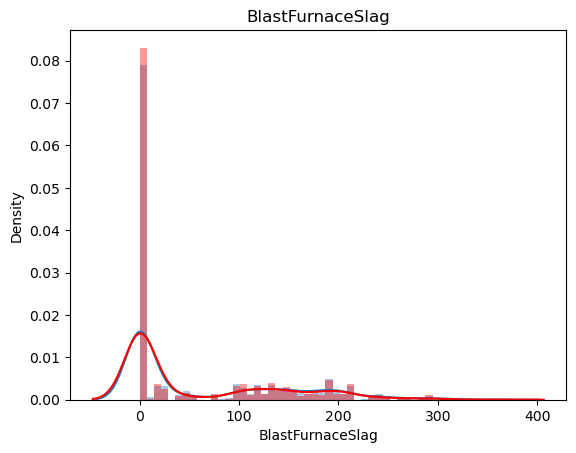

C:\Users\user\AppData\Local\Temp\ipykernel_26768\772918885.py:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train[f'{i}'],bins=50)#.plot.hist(bins=100,grid='on',figsize=(5,5))
C:\Users\user\AppData\Local\Temp\ipykernel_26768\772918885.py:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(test

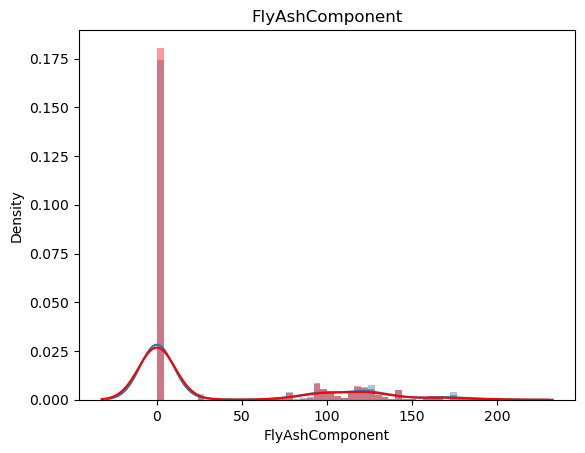

C:\Users\user\AppData\Local\Temp\ipykernel_26768\772918885.py:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train[f'{i}'],bins=50)#.plot.hist(bins=100,grid='on',figsize=(5,5))
C:\Users\user\AppData\Local\Temp\ipykernel_26768\772918885.py:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(test

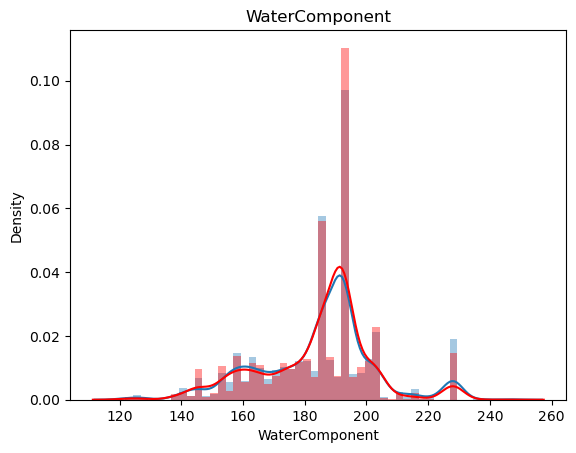

C:\Users\user\AppData\Local\Temp\ipykernel_26768\772918885.py:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train[f'{i}'],bins=50)#.plot.hist(bins=100,grid='on',figsize=(5,5))
C:\Users\user\AppData\Local\Temp\ipykernel_26768\772918885.py:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(test

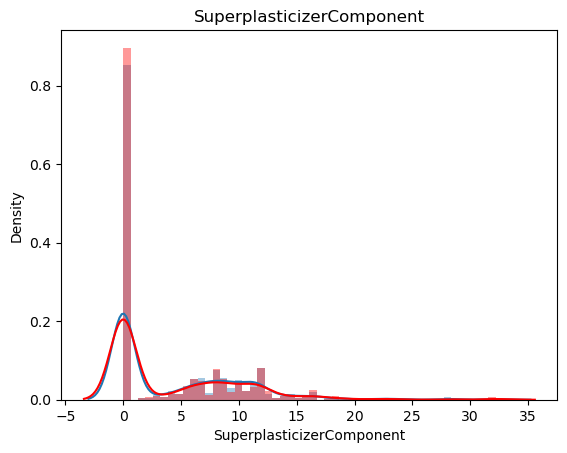

C:\Users\user\AppData\Local\Temp\ipykernel_26768\772918885.py:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train[f'{i}'],bins=50)#.plot.hist(bins=100,grid='on',figsize=(5,5))
C:\Users\user\AppData\Local\Temp\ipykernel_26768\772918885.py:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(test

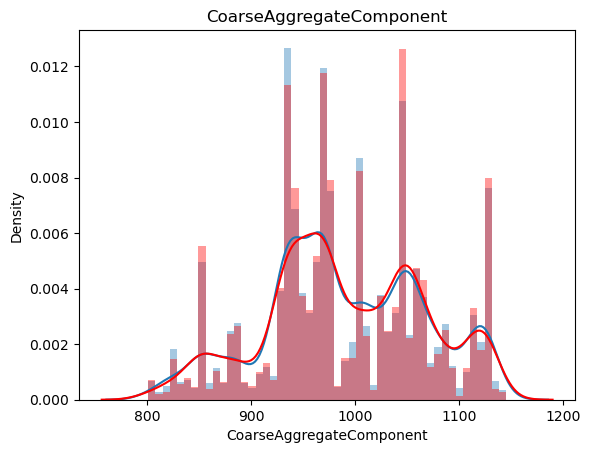

C:\Users\user\AppData\Local\Temp\ipykernel_26768\772918885.py:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train[f'{i}'],bins=50)#.plot.hist(bins=100,grid='on',figsize=(5,5))
C:\Users\user\AppData\Local\Temp\ipykernel_26768\772918885.py:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(test

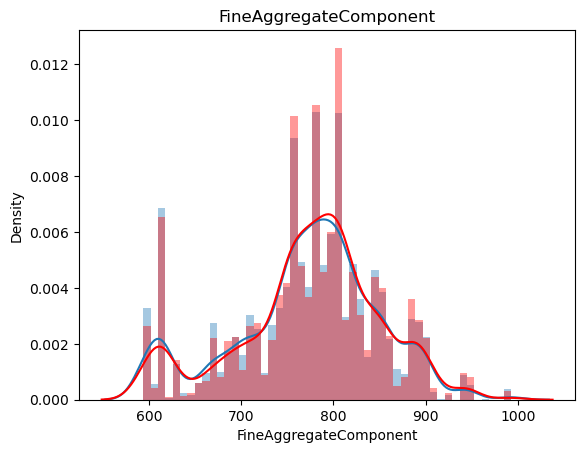

C:\Users\user\AppData\Local\Temp\ipykernel_26768\772918885.py:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train[f'{i}'],bins=50)#.plot.hist(bins=100,grid='on',figsize=(5,5))
C:\Users\user\AppData\Local\Temp\ipykernel_26768\772918885.py:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(test

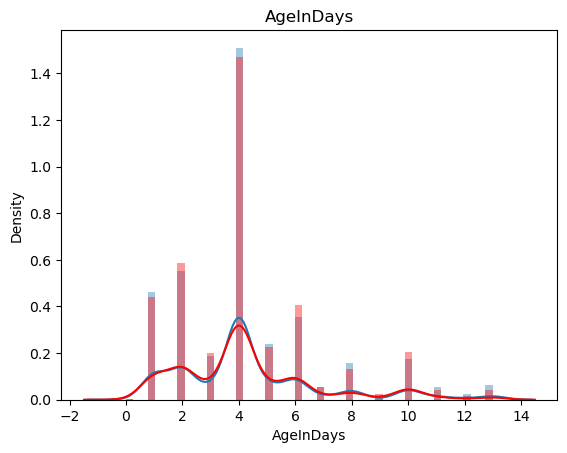

C:\Users\user\AppData\Local\Temp\ipykernel_26768\772918885.py:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train[f'{i}'],bins=50)#.plot.hist(bins=100,grid='on',figsize=(5,5))
C:\Users\user\AppData\Local\Temp\ipykernel_26768\772918885.py:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(test

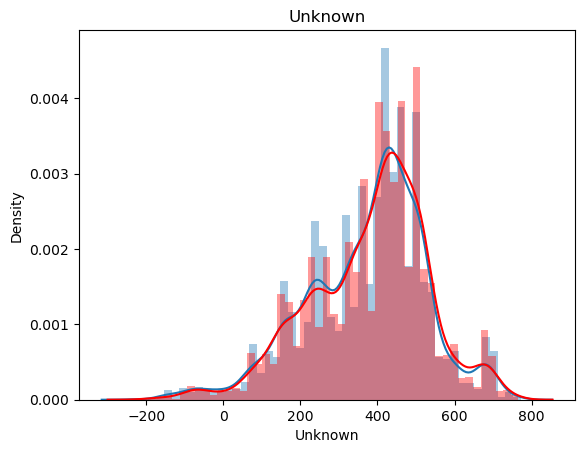

In [17]:
# 콘크리트의 강도는 물과 시멘트의 비율이 낮아지면 증가합니다.
# CementComponent:- Amount of cement is mixed
# BlastFurnaceSlag:- Amount of Blast Furnace Slag is mixed
# FlyAshComponent:- Amount of FlyAsh is mixed
# WaterComponent:- Amount of water is mixed
# SuperplasticizerComponent:- Amount of Super plasticizer is mixed
# CoarseAggregateComponent:- Amount of Coarse Aggregate is mixed
# FineAggregateComponent:- Amount of Coarse Aggregate is mixed
# AgeInDays:- How many days it was left dry
# Strength:- What was the final strength of concrete- (Target)
kor_col = ['시멘트양','용광로 찌꺼기','화석연료 재','물','감수제','건설골재양','미세골제양','양생일','강도']
for i in test.columns:
    plt.title(f'{i}')
    sns.distplot(train[f'{i}'],bins=50)#.plot.hist(bins=100,grid='on',figsize=(5,5))
    sns.distplot(test[f'{i}'],color='red',bins=50)#.plot.hist(bins=100,grid='on',figsize=(5,5))
    plt.show()


In [18]:
from pycaret import regression
regression.setup(session_id=41,data=train,target='Strength')

,Description,Value
0,session_id,41
1,Target,Strength
2,Original Data,"(6411, 10)"
3,Missing Values,False
4,Numeric Features,8
5,Categorical Features,1
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(4487, 22)"


(False,
 -1,
 False,
       CementComponent  BlastFurnaceSlag  FlyAshComponent  WaterComponent  \
 830        381.399994          0.000000         0.000000      185.699997   
 2556       213.500000          0.000000       174.199997      191.699997   
 1644       212.600006          0.000000       100.400002      159.399994   
 1654       380.000000         95.000000         0.000000      228.000000   
 709        238.000000          0.000000         0.000000      185.000000   
 ...               ...               ...              ...             ...   
 3949       331.000000          0.000000         0.000000      192.000000   
 1652       190.300003          0.000000       125.199997      159.199997   
 4248       212.600006          0.000000       100.400002      159.399994   
 3823       212.500000          0.000000       100.400002      159.300003   
 821        149.100006         26.200001       126.500000      183.800003   
 
       SuperplasticizerComponent  CoarseAggregateComp

In [19]:
best = regression.compare_models(sort='RMSE',n_select=4,fold=10)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,9.0748,140.8225,11.8586,0.4741,0.3718,0.3480,0.0500
ridge,Ridge Regression,9.1222,143.4427,11.9636,0.4646,0.3761,0.3503,0.0030
br,Bayesian Ridge,9.1232,143.4534,11.9642,0.4645,0.3762,0.3506,0.0030
lar,Least Angle Regression,9.1214,143.5038,11.9659,0.4643,0.3763,0.3498,0.0030
lr,Linear Regression,9.1235,143.5135,11.9663,0.4643,0.3763,0.3500,0.4020
lightgbm,Light Gradient Boosting Machine,9.1402,144.2190,11.9993,0.4613,0.3732,0.3441,0.0170
catboost,CatBoost Regressor,9.1172,144.5001,12.0135,0.4602,0.3732,0.3429,0.5520
rf,Random Forest Regressor,9.5718,158.2113,12.5686,0.4090,0.3863,0.3545,0.1450
xgboost,Extreme Gradient Boosting,9.5339,158.8261,12.5939,0.4067,0.3924,0.3550,0.0530
et,Extra Trees Regressor,9.9685,173.0526,13.1457,0.3533,0.4056,0.3655,0.0950


In [20]:
best_tune = [regression.tune_model(i) for i in best]

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,9.1135,139.3671,11.8054,0.4878,0.3894,0.3719
1,9.4209,149.4893,12.2266,0.4711,0.3901,0.3750
2,9.7110,168.0043,12.9616,0.3604,0.3955,0.3660
3,8.3980,127.1284,11.2751,0.5281,0.3469,0.3085
4,8.5813,131.3674,11.4616,0.4797,0.3601,0.3330
5,8.9217,134.3137,11.5894,0.4815,0.3607,0.3336
6,9.9894,162.0934,12.7316,0.4264,0.3952,0.3651
7,9.3501,150.1887,12.2552,0.4512,0.3890,0.3612
8,8.4889,125.9744,11.2238,0.5162,0.3354,0.3062


In [21]:
best_tune

[GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                           init=None, learning_rate=0.1, loss='ls', max_depth=5,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.3, min_impurity_split=None,
                           min_samples_leaf=3, min_samples_split=5,
                           min_weight_fraction_leaf=0.0, n_estimators=50,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=41, subsample=0.6, tol=0.0001,
                           validation_fraction=0.1, verbose=0, warm_start=False),
 Ridge(alpha=4.07, copy_X=True, fit_intercept=True, max_iter=None,
       normalize=False, random_state=41, solver='auto', tol=0.001),
 BayesianRidge(alpha_1=0.05, alpha_2=0.1, alpha_init=None, compute_score=False,
               copy_X=True, fit_intercept=True, lambda_1=0.2, lambda_2=0.1,
               lambda_init=None, n

In [22]:
enssemble = []
for i in range(len(best_tune)):
    best_tune[i].fit(train.drop('Strength',axis=1),train['Strength'])
    enssemble.append(best_tune[i].predict(test))

In [23]:
enssemble = np.array(enssemble)
enssemble.mean(axis=0)

array([39.40662493, 22.49540445, 27.81262406, ..., 36.93672836,
       47.22441746, 24.55173624])

<AxesSubplot: ylabel='Frequency'>

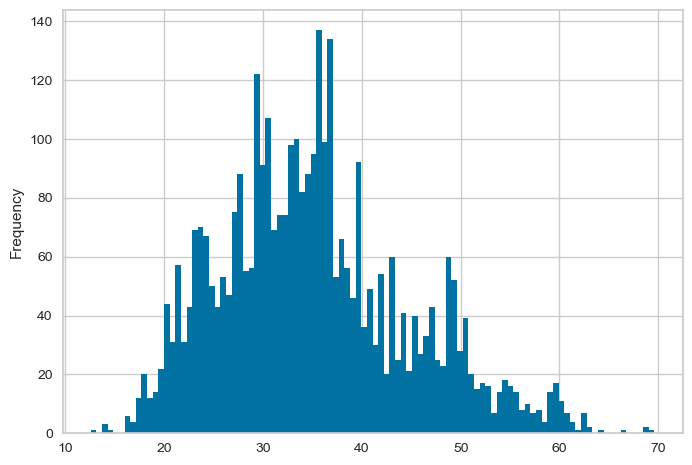

In [30]:
sub = pd.read_csv('./sample_submission.csv')
sub['Strength'] = enssemble[0] #.mean(axis=0)
sub = sub.set_index('id')
sub.to_csv('./submission.csv')
sub['Strength'].plot.hist(bins=100)

<AxesSubplot: ylabel='Frequency'>

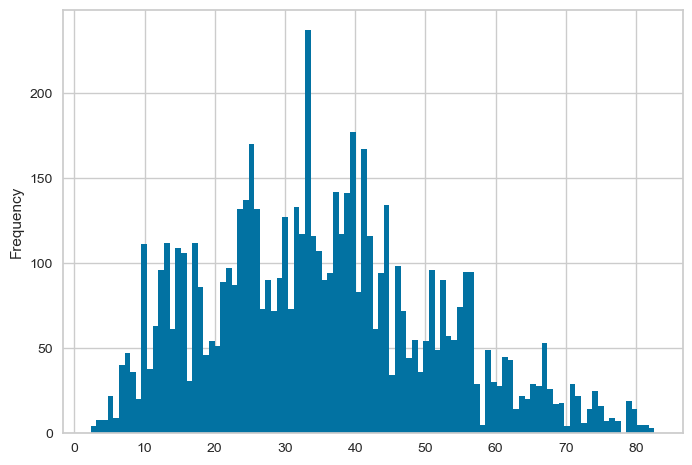

In [31]:
train.Strength.plot.hist(bins=100)